##📌 EXTRAÇÃO

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


df = pd.read_csv('/content/dados_tratados.csv')
df.head()

,ID_cliente,Cancelamento,Genero,Idoso,Tem_parceiro,Tem_dependentes,Meses_com_empresa,Servico_telefonico,Multiplas_linhas,Tipo_internet,...,Protecao_aparelho,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Valor_mensal,Valor_total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


In [3]:
# Ver as colunas disponíveis
df.columns

Index(['ID_cliente', 'Cancelamento', 'Genero', 'Idoso', 'Tem_parceiro',
       'Tem_dependentes', 'Meses_com_empresa', 'Servico_telefonico',
       'Multiplas_linhas', 'Tipo_internet', 'Seguranca_online',
       'Backup_online', 'Protecao_aparelho', 'Suporte_tecnico', 'Streaming_TV',
       'Streaming_filmes', 'Tipo_contrato', 'Fatura_digital',
       'Forma_pagamento', 'Valor_mensal', 'Valor_total', 'Contas_Diarias'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_cliente          7267 non-null   object 
 1   Cancelamento        7043 non-null   float64
 2   Genero              7267 non-null   object 
 3   Idoso               7267 non-null   int64  
 4   Tem_parceiro        7267 non-null   int64  
 5   Tem_dependentes     7267 non-null   int64  
 6   Meses_com_empresa   7267 non-null   int64  
 7   Servico_telefonico  7267 non-null   int64  
 8   Multiplas_linhas    7267 non-null   object 
 9   Tipo_internet       7267 non-null   object 
 10  Seguranca_online    7267 non-null   object 
 11  Backup_online       7267 non-null   object 
 12  Protecao_aparelho   7267 non-null   object 
 13  Suporte_tecnico     7267 non-null   object 
 14  Streaming_TV        7267 non-null   object 
 15  Streaming_filmes    7267 non-null   object 
 16  Tipo_c

## 🧹 Linpeza e Preparação dos Dados

In [5]:
#✔️ Remover colunas irrelevantes
df = df.drop(columns=['ID_cliente'])

In [6]:
# Remover linhas onde Cancelamento está nulo
df = df.dropna(subset=["Cancelamento"])

# Converter Valor_total para numérico (float) e Remover nulos de 'Valor_total
df["Valor_total"] = pd.to_numeric(df["Valor_total"], errors="coerce")
df = df.dropna(subset=['Valor_total'])

# Conferir resultados
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cancelamento        7032 non-null   float64
 1   Genero              7032 non-null   object 
 2   Idoso               7032 non-null   int64  
 3   Tem_parceiro        7032 non-null   int64  
 4   Tem_dependentes     7032 non-null   int64  
 5   Meses_com_empresa   7032 non-null   int64  
 6   Servico_telefonico  7032 non-null   int64  
 7   Multiplas_linhas    7032 non-null   object 
 8   Tipo_internet       7032 non-null   object 
 9   Seguranca_online    7032 non-null   object 
 10  Backup_online       7032 non-null   object 
 11  Protecao_aparelho   7032 non-null   object 
 12  Suporte_tecnico     7032 non-null   object 
 13  Streaming_TV        7032 non-null   object 
 14  Streaming_filmes    7032 non-null   object 
 15  Tipo_contrato       7032 non-null   object 
 16  Fatura_digi

,Cancelamento,Genero,Idoso,Tem_parceiro,Tem_dependentes,Meses_com_empresa,Servico_telefonico,Multiplas_linhas,Tipo_internet,Seguranca_online,...,Protecao_aparelho,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_contrato,Fatura_digital,Forma_pagamento,Valor_mensal,Valor_total,Contas_Diarias
0,0.0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0.0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1.0,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1.0,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### Tratar colunas com "No internet service"
Isso evita multicolinearidade.

In [7]:
# Isso evita multicolinearidade.
cols_internet = [
    'Seguranca_online', 'Backup_online', 'Protecao_aparelho',
    'Suporte_tecnico', 'Streaming_TV', 'Streaming_filmes'
]

for col in cols_internet:
    df[col] = df[col].replace({'No internet service': 'No'})

### 🎯 Encoding
Inicialmente foi identificado os valores únicos de cada coluna e posteriormente transformado as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilizou-se um método de codificação adequado, como o one-hot encoding.

In [8]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
print(df_encoded.head())
print(df_encoded.shape)

   Cancelamento  Idoso  Tem_parceiro  Tem_dependentes  Meses_com_empresa  \
0           0.0      0             1                1                  9   
1           0.0      0             0                0                  9   
2           1.0      0             0                0                  4   
3           1.0      1             1                0                 13   
4           1.0      1             1                0                  3   

   Servico_telefonico  Fatura_digital  Valor_mensal  Valor_total  \
0                   1               1          65.6       593.30   
1                   1               0          59.9       542.40   
2                   1               1          73.9       280.85   
3                   1               1          98.0      1237.85   
4                   1               1          83.9       267.40   

   Contas_Diarias  ...  Suporte_tecnico_No  Streaming_TV_1  Streaming_TV_No  \
0        2.186667  ...               False            T

Distribuição das classes:
Cancelamento
0.0    0.734215
1.0    0.265785
Name: proportion, dtype: float64


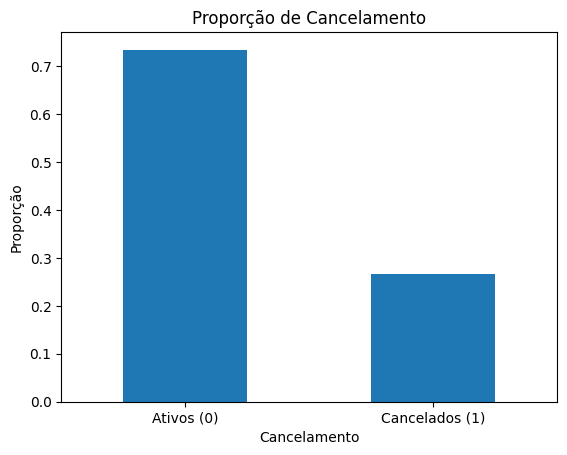

In [10]:
# Proporção de clientes que cancelaram vs ativos
proporcao = df_encoded['Cancelamento'].value_counts(normalize=True)

print("Distribuição das classes:")
print(proporcao)

# Visualização
proporcao.plot(kind='bar')
plt.title("Proporção de Cancelamento")
plt.xticks([0,1], ["Ativos (0)", "Cancelados (1)"], rotation=0)
plt.ylabel("Proporção")
plt.show()

In [11]:
df_encoded.isnull().sum()

,0
Cancelamento,0
Idoso,0
Tem_parceiro,0
Tem_dependentes,0
Meses_com_empresa,0
Servico_telefonico,0
Fatura_digital,0
Valor_mensal,0
Valor_total,0
Contas_Diarias,0


### 🔄 Normalização dos dados
A normalização é essencial para modelos sensíveis à escala, como KNN, SVM, Regressão Logística e Redes Neurais. Neste caso, aplicamos a normalização Min-Max, que ajusta as variáveis numéricas para o intervalo [0,1], garantindo que todas tenham o mesmo peso no treinamento.



In [12]:
from sklearn.preprocessing import MinMaxScaler # Added this line

# Separar colunas numéricas (exceto a variável alvo 'Cancelamento')
colunas_numericas = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('Cancelamento')

# Inicializar o scaler
scaler = MinMaxScaler()

# Aplicar a normalização apenas nas colunas numéricas
df_encoded[colunas_numericas] = scaler.fit_transform(df_encoded[colunas_numericas])

# Exibir os primeiros registros normalizados
print(df_encoded.head())

   Cancelamento  Idoso  Tem_parceiro  Tem_dependentes  Meses_com_empresa  \
0           0.0    0.0           1.0              1.0           0.112676   
1           0.0    0.0           0.0              0.0           0.112676   
2           1.0    0.0           0.0              0.0           0.042254   
3           1.0    1.0           1.0              0.0           0.169014   
4           1.0    1.0           1.0              0.0           0.028169   

   Servico_telefonico  Fatura_digital  Valor_mensal  Valor_total  \
0                 1.0             1.0      0.471144     0.066294   
1                 1.0             0.0      0.414428     0.060420   
2                 1.0             1.0      0.553731     0.030239   
3                 1.0             1.0      0.793532     0.140670   
4                 1.0             1.0      0.653234     0.028687   

   Contas_Diarias  ...  Suporte_tecnico_No  Streaming_TV_1  Streaming_TV_No  \
0        0.471144  ...               False            T

Correlação entre as variáveis

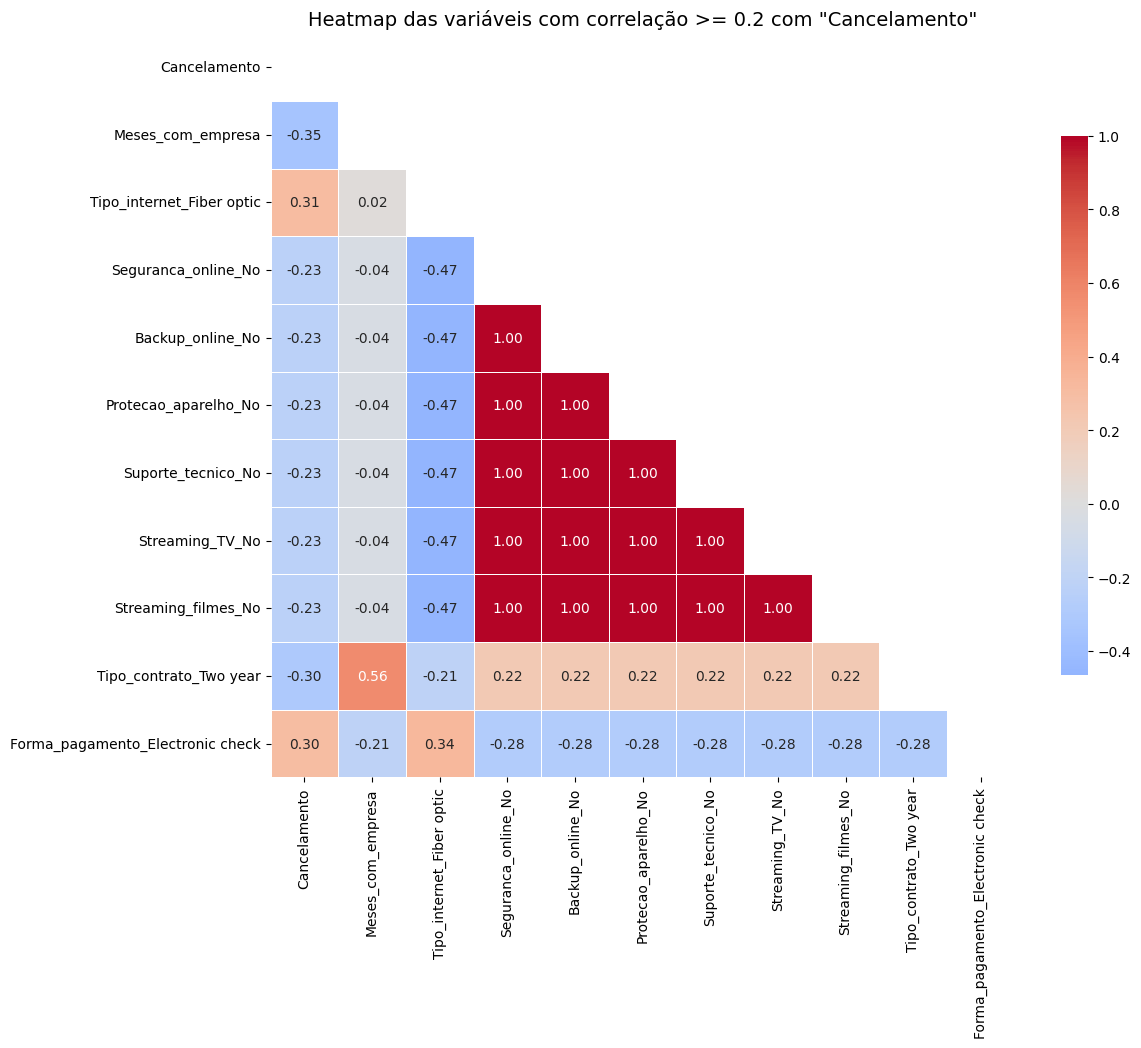

In [13]:
# Calcular a matriz de correlação
corr = df_encoded.corr(numeric_only=True)

# Definir a variável alvo
target_var = 'Cancelamento'

# Definir o limiar mínimo de correlação absoluta
limiar = 0.2

# Selecionar variáveis que tenham correlação absoluta >= limiar com a variável alvo
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar matriz de correlação somente com variáveis relevantes
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar máscara para esconder triângulo superior
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"', fontsize=14)
plt.show()

/tmp/ipython-input-1563833735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelamento", y="Meses_com_empresa", data=df_encoded, palette="Set2")
/tmp/ipython-input-1563833735.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cancelamento", y="Valor_total", data=df_encoded, palette="Set3")


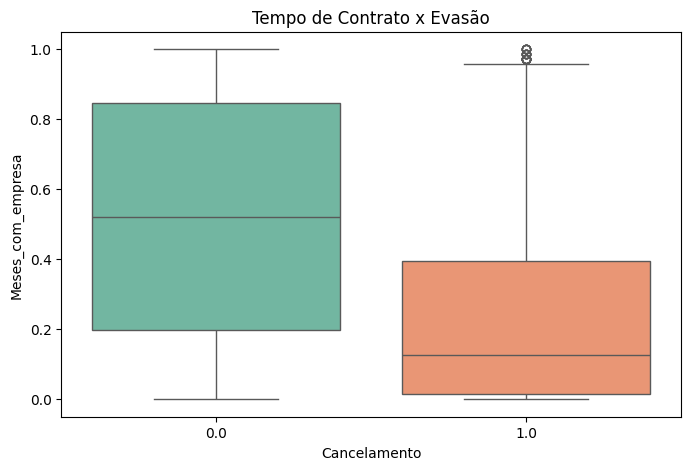

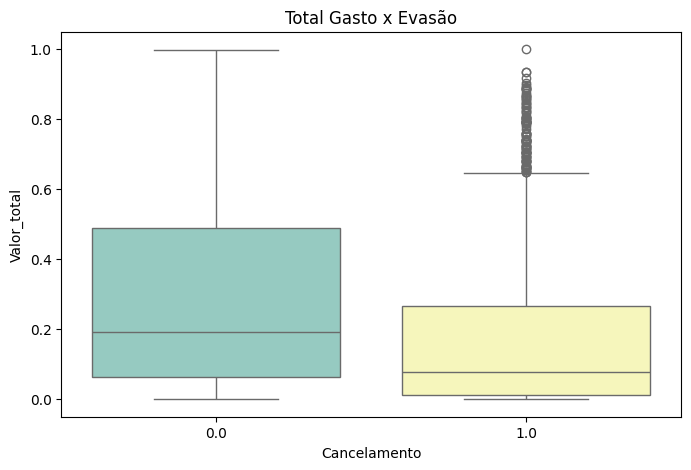

In [14]:
# Boxplot: Tempo de contrato × Evasão
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancelamento", y="Meses_com_empresa", data=df_encoded, palette="Set2")
plt.title("Tempo de Contrato x Evasão")

# Boxplot: Total gasto × Evasão
plt.figure(figsize=(8,5))
sns.boxplot(x="Cancelamento", y="Valor_total", data=df_encoded, palette="Set3")
plt.title("Total Gasto x Evasão")
plt.show()

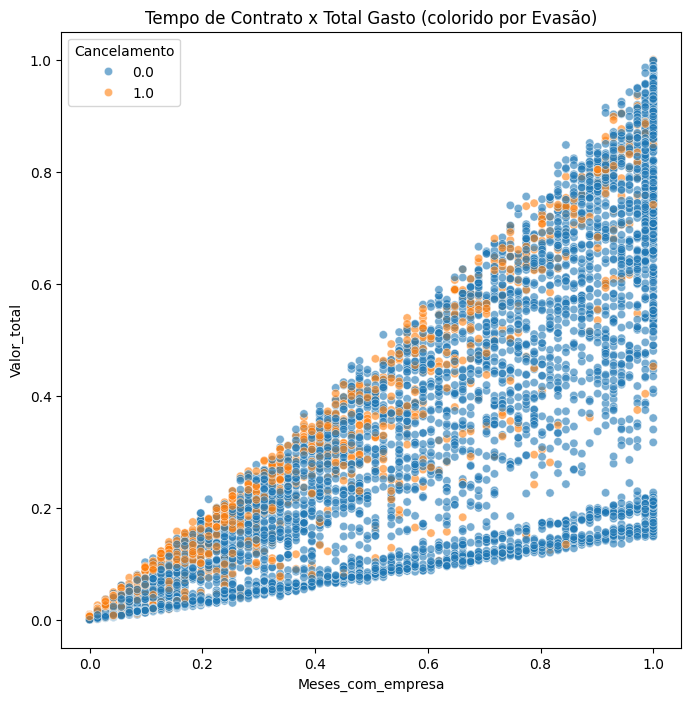

In [15]:
# Dispersão: Tempo de contrato × Total gasto, colorindo pela evasão
plt.figure(figsize=(8,8))
sns.scatterplot(x="Meses_com_empresa", y="Valor_total", hue="Cancelamento", data=df_encoded, alpha=0.6, palette="tab10")
plt.title("Tempo de Contrato x Total Gasto (colorido por Evasão)")
plt.show()

## 🤖 Modelagem Preditiva

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [17]:
# Definir variáveis preditoras (X) e alvo (y)
X = df_encoded.drop("Cancelamento", axis=1)  # todas as colunas menos a de saída
y = df_encoded["Cancelamento"]               # variável alvo

# Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)
print("Proporção de classes no treino:", y_train.value_counts(normalize=True))
print("Proporção de classes no teste:", y_test.value_counts(normalize=True))

Tamanho do conjunto de treino: (4922, 31)
Tamanho do conjunto de teste: (2110, 31)
Proporção de classes no treino: Cancelamento
0.0    0.734254
1.0    0.265746
Name: proportion, dtype: float64
Proporção de classes no teste: Cancelamento
0.0    0.734123
1.0    0.265877
Name: proportion, dtype: float64


In [18]:
from imblearn.over_sampling import SMOTE # Added this line

# Scale the training data before applying SMOTE
scaler_smote = StandardScaler()
X_train_scaled = scaler_smote.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Tamanho do conjunto de treino balanceado:", X_train_bal.shape)
print("Proporção de classes no treino balanceado:", y_train_bal.value_counts(normalize=True))

Tamanho do conjunto de treino balanceado: (7228, 31)
Proporção de classes no treino balanceado: Cancelamento
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


### 🔹 Modelo 1 — Regressão Logística

* A Regressão Logística é um modelo estatístico clássico e bastante usado para problemas de churn.

* Ela calcula probabilidades de evasão baseadas em uma função sigmoide.

* Por que normalizar? Esse modelo é sensível à escala das variáveis (ex.: meses com empresa varia de 1 a 72, já variáveis binárias variam entre 0 e 1).

Sem normalização, variáveis com escala maior podem ter mais peso do que o necessário.



In [19]:
# Modelo 1 - Regressão Logística
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),  # normalização
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_pipeline.fit(X_train, y_train)
y_pred_logreg = log_reg_pipeline.predict(X_test)

print("🔹 Modelo 1 - Regressão Logística (com normalização)")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


🔹 Modelo 1 - Regressão Logística (com normalização)
Acurácia: 0.8018957345971564
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.65      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



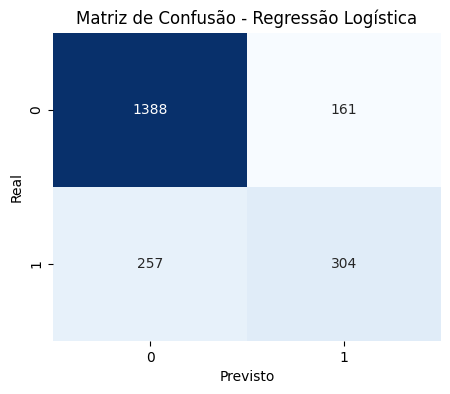

In [21]:
# Função para Matriz de Confusão
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()
plot_confusion_matrix(y_test, y_pred_logreg, "Regressão Logística")

### 🎯Aplicar SMOTE no conjunto de treino

In [22]:
#Aplicar SMOTE no conjunto
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Scale the test data
X_test_scaled = scaler_smote.transform(X_test) # Added this line

# =========================
# Treinar Regressão Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

# Avaliar no conjunto de teste
y_pred = log_reg.predict(X_test_scaled)

print("🔹 Regressão Logística com SMOTE")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

🔹 Regressão Logística com SMOTE
Acurácia: 0.7497630331753554
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1549
         1.0       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



### Analisando os resultados:

| Modelo                      | Acurácia | Precision classe 1 | Recall classe 1 | F1 classe 1 |
| --------------------------- | -------- | ------------------ | --------------- | ----------- |
| Regressão Logística normal  | 0.8019   | 0.65               | 0.54            | 0.59        |
| Regressão Logística + SMOTE | 0.7498   | 0.52               | 0.81            | 0.63        |




🔹 Interpretação:

O modelo original tem maior acurácia (0.80 vs 0.75), mas recall da classe 1 baixo (0.54), ou seja, ele perde muitos casos positivos.

O modelo com SMOTE tem recall da classe 1 muito maior (0.81), ou seja, captura mais casos positivos, mas perde um pouco de acurácia geral (0.75).

O F1-score da classe 1 também melhora (0.63 vs 0.59), mostrando melhor equilíbrio entre precisão e recall para a classe minoritária

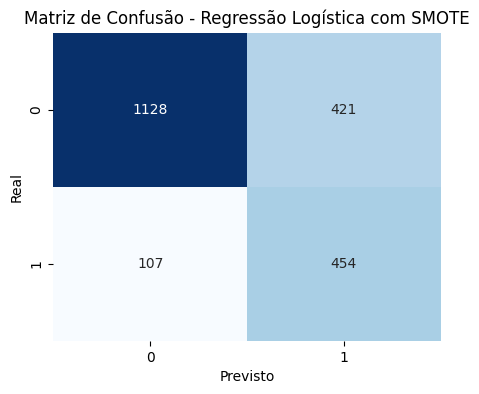

In [23]:
# Matriz de Confusão - SMOTE
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Regressão Logística com SMOTE")

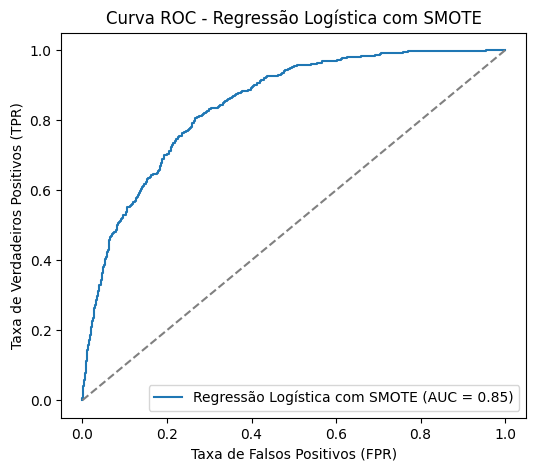

In [24]:
# Curva ROC - SMOTE
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.title(f"Curva ROC - {model_name}")
    plt.legend()
    plt.show()

# Para regressão logística com SMOTE, usamos predict_proba no conjunto de teste escalado
plot_roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:,1], "Regressão Logística com SMOTE")

### 🔹 Modelo 2 — Random Forest (sem normalização)

* O Random Forest é um ensemble de Árvores de Decisão.

* Ele cria várias árvores e combina os resultados, o que o torna robusto contra overfitting.

* Por que não normalizar? Árvores de Decisão e Random Forests são baseadas em divisões (thresholds) e não em distâncias. Logo, a escala dos dados não influencia no resultado.

In [25]:
# Modelo 2 - Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"  # bom para lidar com possíveis classes desbalanceadas
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Modelo 2 - Random Forest (sem normalização)")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Modelo 2 - Random Forest (sem normalização)
Acurácia: 0.7853080568720379
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1549
         1.0       0.63      0.47      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.79      0.77      2110



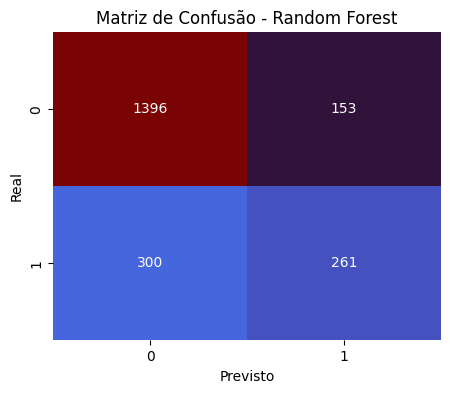

In [26]:
# Função para Matriz de Confusão
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="turbo", cbar=False)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

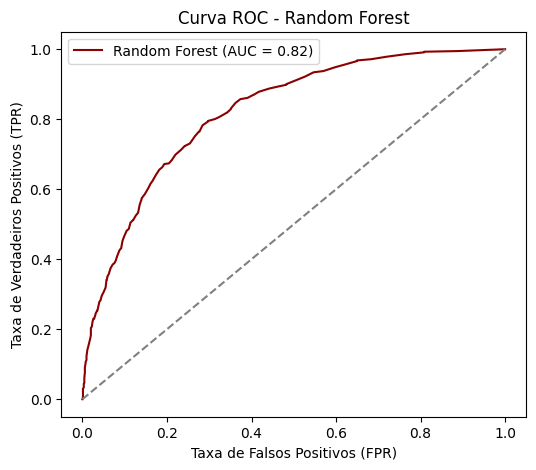

In [27]:
# Função para Curva ROC
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkred", label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0,1], [0,1], linestyle="--", color="gray")
    plt.xlabel("Taxa de Falsos Positivos (FPR)")
    plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
    plt.title(f"Curva ROC - {model_name}")
    plt.legend()
    plt.show()

plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], "Random Forest")


### 🔎análise de importância das variáveis
1. Regressão Logística

O notebook treina o modelo `LogisticRegression`.

A importância das variáveis foi analisada pelos coeficientes do modelo `log_reg`.

* Valores positivos indicam maior probabilidade de cancelamento (evasão).

* Valores negativos indicam menor probabilidade.

* A magnitude indica a força da contribuição.
---
2. Random Forest

* O modelo `RandomForestClassifier` foi treinado.

* Esse algoritmo calcula automaticamente a importância das variáveis com base na redução de impureza nas árvores.


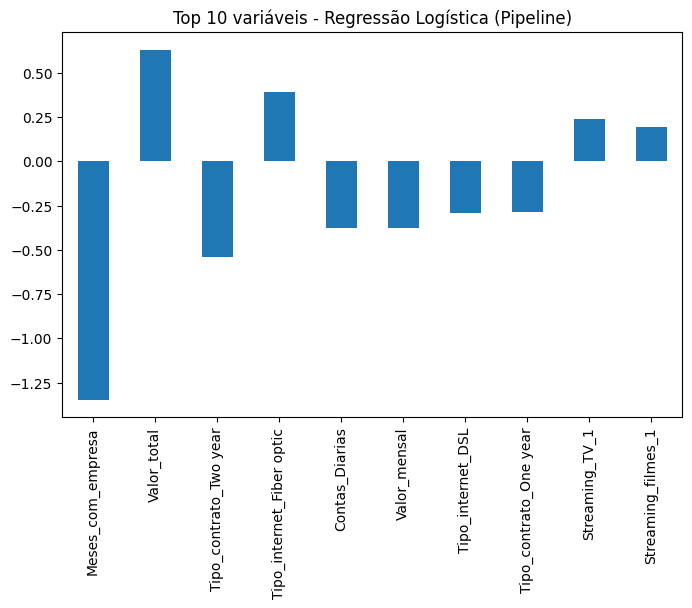

In [40]:
# Coeficientes do modelo dentro do pipeline
coef = pd.Series(
    log_reg_pipeline.named_steps["log_reg"].coef_[0],
    index=X_train.columns
)

# Ordenar por importância absoluta e pegar os 10 primeiros
top10 = coef.reindex(coef.abs().sort_values(ascending=False).index[:10])

# Plotar
plt.figure(figsize=(8,5))
top10.plot(kind="bar", title="Top 10 variáveis - Regressão Logística (Pipeline)")
plt.show()


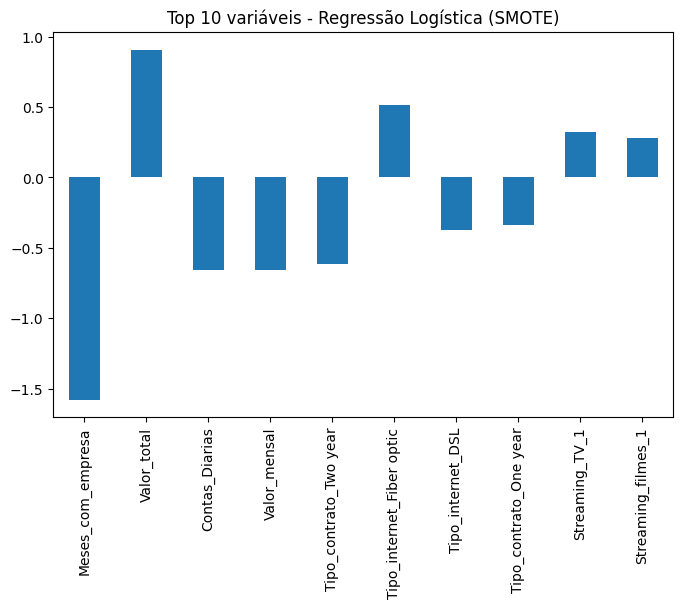

In [39]:
# Coeficientes do modelo treinado diretamente
coef = pd.Series(log_reg.coef_[0], index=X_train.columns)

# Ordenar por importância absoluta e pegar os 10 primeiros
top10 = coef.reindex(coef.abs().sort_values(ascending=False).index[:10])

# Plotar
plt.figure(figsize=(8,5))
top10.plot(kind="bar", title="Top 10 variáveis - Regressão Logística (SMOTE)")
plt.show()

### 📋  Interpretação e Conclusões

## 📊 Relatório

###1. Desempenho dos Modelos
🔹 Regressão Logística

Sem SMOTE:

* Acurácia: **80%**

* Recall para churn (classe 1):**54%**

O modelo identificou bem clientes que não cancelam (classe 0), mas teve dificuldade em detectar churners.


Com SMOTE:

* Acurácia: **75%**

* Recall para churn: **81%**

Após balanceamento, o modelo melhorou significativamente na detecção de churners, embora com perda de precisão.

---
🔹 Random Forest

* Acurácia: 78%

* Recall para churn: 47%

Apesar de boa acurácia geral, o modelo também mostrou dificuldade em identificar clientes que cancelam.

---

###2. Importância das Variáveis
🔹 Regressão Logística

Os coeficientes indicam que variáveis relacionadas a:

* Tempo de contrato (tenure)

* Tipo de contrato (mensal vs. anual)

* Serviços adicionais (Internet, Streaming, Suporte técnico)
tiveram maior peso na previsão de churn.

Clientes com contrato mensal mostraram alta propensão à evasão.

---

🔹 Random Forest

A importância de variáveis apontou:

* Tenure (tempo de permanência) → clientes novos são mais propensos a sair.

* TotalCharges (valor total pago) e MonthlyCharges (mensalidade) → contas mais caras aumentam a chance de churn.

* Tipo de contrato e InternetService também tiveram grande impacto.

---

###3. Principais Fatores que Influenciam a Evasão

1. Tempo de permanência baixo (tenure curto) – clientes recentes são mais propensos a cancelar.

2. Tipo de contrato mensal – planos sem fidelidade elevam a probabilidade de cancelar.

3. Cobranças altas (MonthlyCharges/TotalCharges) – valores elevados aumentam a evasão.

4. Serviços adicionais não contratados – clientes sem pacotes extras tendem a ter menor engajamento.

5. Tipo_contrato (Month-to-month): +0.41, Clientes com contratos mensais têm significativamente maior probabilidade de cancelar

6. Forma_pagamento (Electronic check): +0.34, Pagamentos por cheque eletrônico estão fortemente associados à evasão

7. Valor_mensal: +0.29, Valores mensais mais altos correlacionam-se com maior evasão

8. Tipo_internet (Fibra óptica): +0.25, Clientes com fibra óptica têm maior tendência ao cancelamento

---
###4. Estratégias de Retenção

Com base nos insights:

* Ofertas personalizadas para novos clientes → criar benefícios de fidelização já nos primeiros meses.

* Incentivos para contratos anuais/trimestrais → descontos ou bônus para reduzir cancelamentos em planos mensais.

* Revisão de preços e pacotes → analisar se clientes com contas mais altas podem receber planos ajustados.

* Upselling inteligente de serviços adicionais → oferecer pacotes de streaming, suporte técnico e internet premium de forma segmentada.

* Monitoramento de clientes de risco → criar um modelo preditivo interno para acionar equipe de atendimento preventivo.

---

###📌 Conclusão:
O **Random Forest** foi útil para identificar variáveis-chave, enquanto a Regressão Logística com SMOTE apresentou melhor recall na detecção de churners, o que é importante para estratégias de retenção. Os fatores mais críticos são tempo de permanência, tipo de contrato e valor da mensalidade.